IRIS FLOWER CLASSIFICATION

importing all the required libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from ipywidgets import interact
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math

loading the dataset

In [2]:
data=pd.read_csv('IRIS.csv')

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


PERFORMING DATA PROCESSING AND CLEANING

In [4]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
data.shape

(150, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [9]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
data['species_label']=data['species'].map({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3})

<Axes: xlabel='species', ylabel='count'>

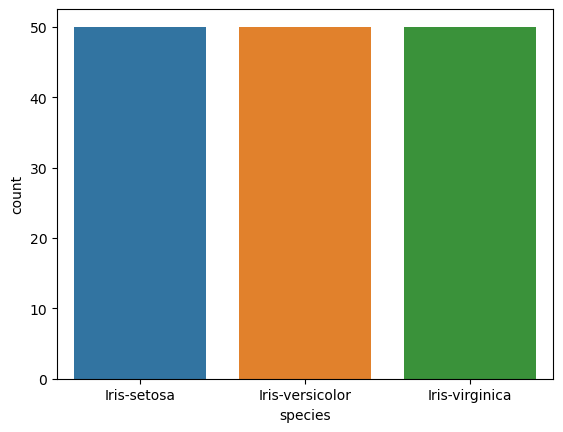

In [12]:
sns.countplot(x='species',data=data)

In [13]:
@interact(variable=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
def analysis(variable):
  sns.boxplot(x='species',y=variable,data=data)
  plt.title(f'species v/s {variable}')
  plt.xlabel('Species')
  plt.ylabel(f'{variable}')

interactive(children=(Dropdown(description='variable', options=('sepal_length', 'sepal_width', 'petal_length',…

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


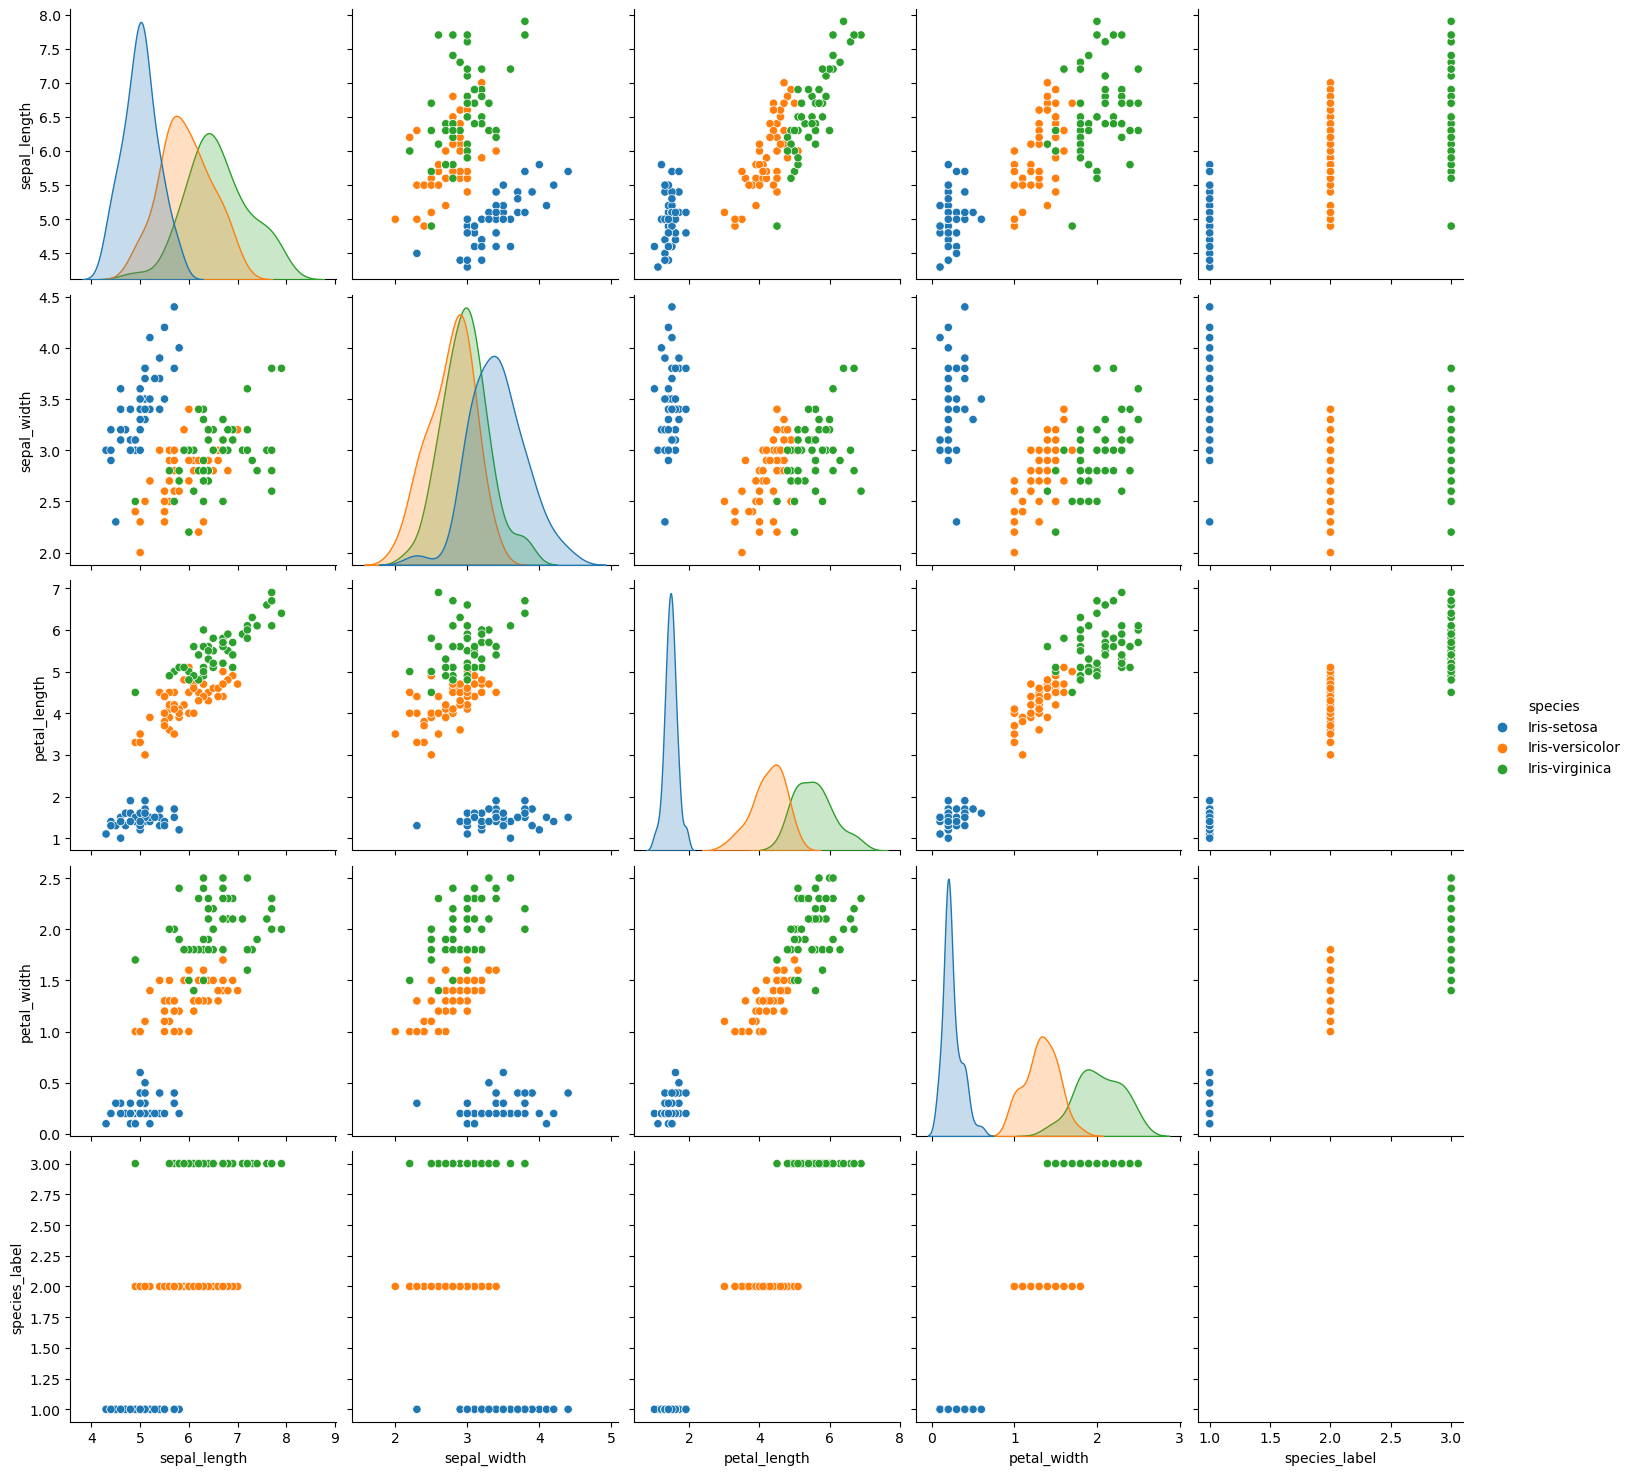

In [14]:
sns.pairplot(data, hue="species", size=3)

Text(0, 0.5, 'Sepal Width')

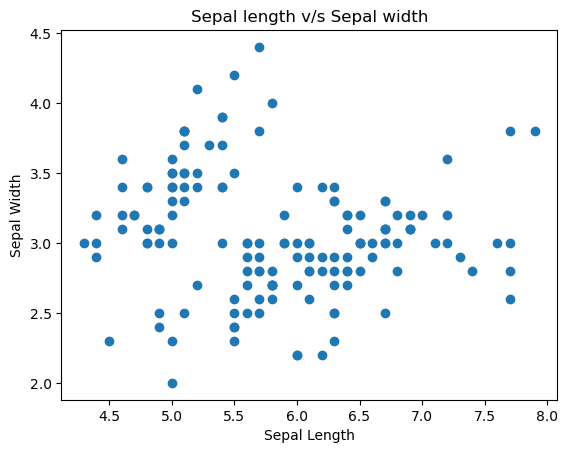

In [15]:
plt.scatter(x='sepal_length',y='sepal_width',data=data)
plt.title('Sepal length v/s Sepal width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

Text(0, 0.5, 'Petal Width')

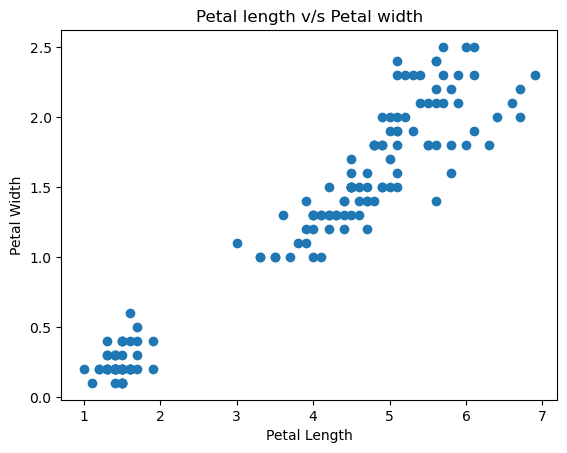

In [16]:
plt.scatter(x='petal_length',y='petal_width',data=data)
plt.title('Petal length v/s Petal width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [17]:
x=data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [18]:
y=data['species_label']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [20]:
lr=LinearRegression()

In [21]:
lr.fit(x_train,y_train)

LinearRegression()

In [22]:
prediction=lr.predict(x_test)

In [23]:
mae = mean_absolute_error(y_test,prediction)

In [24]:
mse = mean_squared_error(y_test,prediction)

In [25]:
print('The mean absolute error is : ',mae)
print('The mean squared error is : ',mse)

The mean absolute error is :  0.14669907762634188
The mean squared error is :  0.03723364456197502


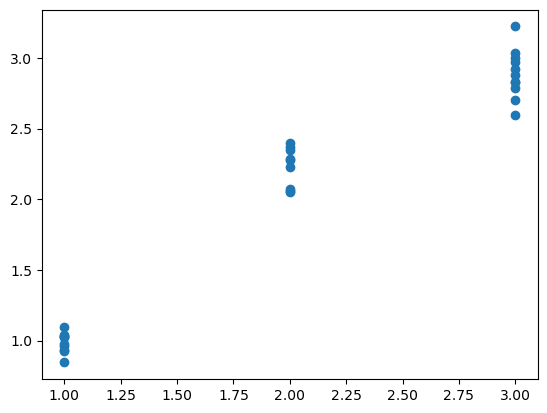

In [26]:
plt.scatter(y_test,prediction)

In [27]:
def predict(a,b,c,d):
  n=np.array([[a,b,c,d]])
  prediction= lr.predict(n)
  print('The species for the given data is : ',math.ceil(prediction))
  if math.ceil(prediction)==1:
    print('The species is Iris-setosa	')
  elif math.ceil(prediction)==2:
    print('The species is Iris-versicolor	')
  else:
    print('The species is Iris-virginica	')

In [28]:
predict(5.1,3.5,1.4,0.2)

The species for the given data is :  1
The species is Iris-setosa	


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
predict(6.2,3.4,5.4,2.3)

The species for the given data is :  3
The species is Iris-virginica	


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
